In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
%matplotlib inline

df = pd.read_csv('/home/jcpince/work/repos/dcbu/ts0.csv', delimiter=',', na_values='na')
# drop the last empty column
df = df.iloc[:, :-1]
columns = df.columns.tolist()
for column in columns:
    print("Column name: %s" % column)

Column name: last_rx_done_core_ticks
Column name: last_new_rx_core_ticks


In [7]:
df_packet_ticks = df[['last_rx_done_core_ticks', 'last_new_rx_core_ticks']].dropna()

In [8]:
print('df_packet_ticks info:')
df_packet_ticks.info()
print('Length: %d' % len(df_packet_ticks))

df_packet_ticks info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 970
Data columns (total 2 columns):
last_rx_done_core_ticks    971 non-null int64
last_new_rx_core_ticks     971 non-null int64
dtypes: int64(2)
memory usage: 22.8 KB
Length: 971


In [9]:
df_packet_ticks['duration'] = df_packet_ticks['last_rx_done_core_ticks'] - \
    df_packet_ticks['last_new_rx_core_ticks']
# Remove < 0 durations since they correspond to TSC overflow
df_packet_ticks = df_packet_ticks[df_packet_ticks['duration'] >= 0]
df_packet_ticks['duration'].describe()

count    971.0
mean     534.0
std        0.0
min      534.0
25%      534.0
50%      534.0
75%      534.0
max      534.0
Name: duration, dtype: float64

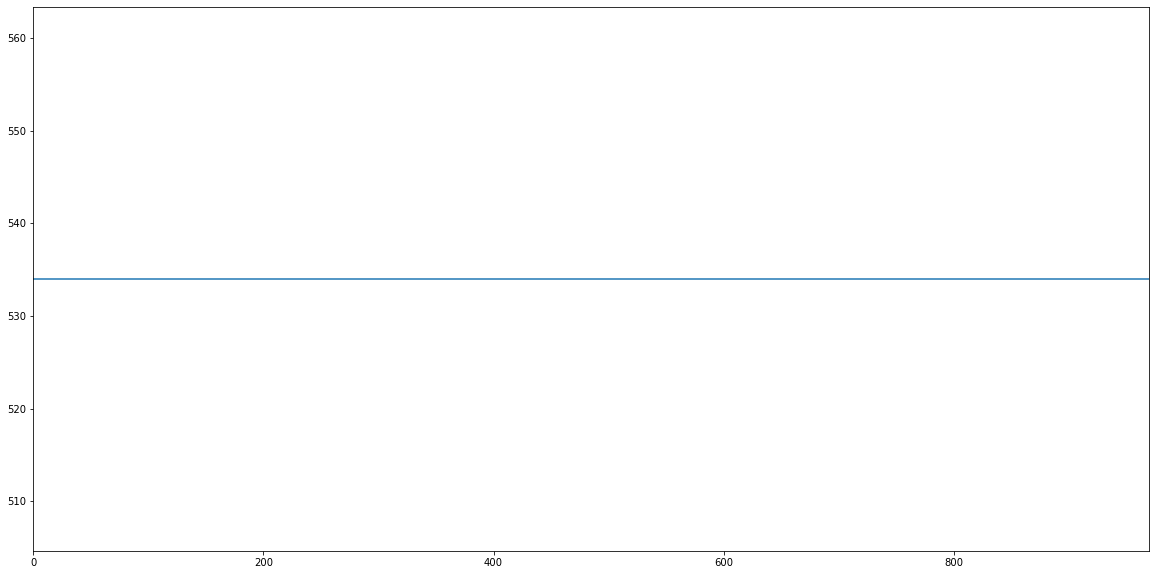

In [10]:
df_packet_ticks['duration'].plot(figsize=(20,10))

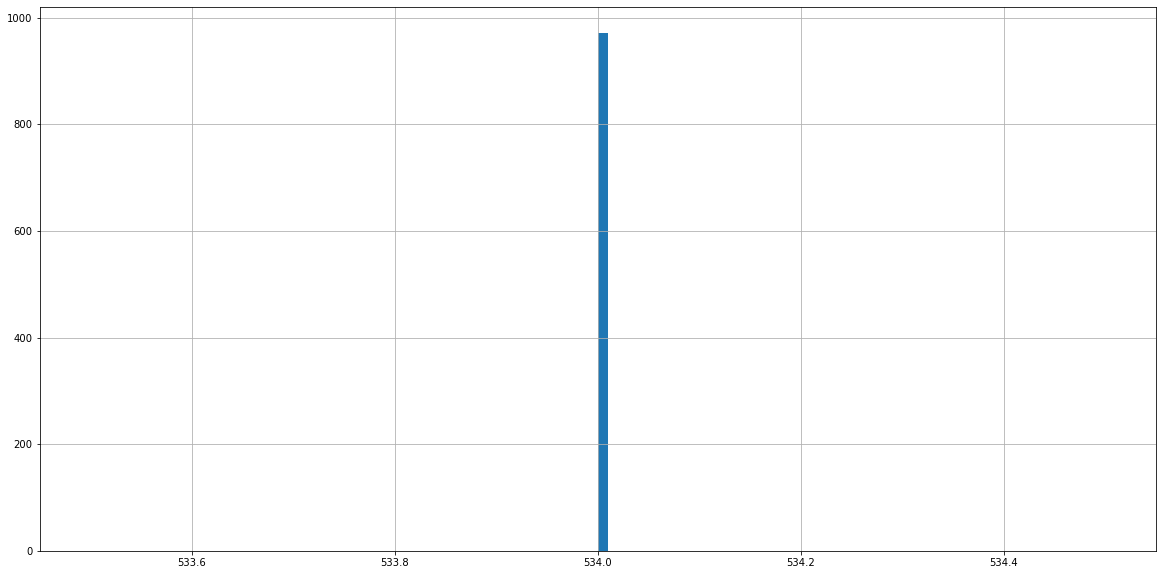

In [11]:
# Plot the histogram zooming on the durations below 1000 ticks
#below_1000 = df_fwrite_ticks['duration'] < 1000
#df_fwrite_ticks_below_1000 = df_fwrite_ticks[below_1000]
#print("Number of write durations below 1000 ticks: %d" % len(df_fwrite_ticks_below_1000))
#df_fwrite_ticks_below_1000['duration'].hist(bins=100, figsize=(20,10))
df_packet_ticks['duration'].hist(bins=100, figsize=(20,10))

In [12]:
# Compare the write ticks durations and the memset ticks durations
#df_memset_ticks['duration'].plot(alpha=0.5, label='mem durations (ticks)', figsize=(20,20))
#df_fwrite_ticks_below_1000['duration'].plot(alpha=0.5, label='fwrite durations (ticks)', figsize=(20,20))
#pyplot.legend(loc='upper right')